In [1]:
import torch
from memflow.phasespace.phasespace import PhaseSpace
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from  memflow.phasespace.utils import *
torch.set_default_dtype(torch.double)

In [3]:
E_CM = 13000
phasespace = PhaseSpace(E_CM, [21,21], [25,6,-6,21])

In [4]:
points_out, momenta, weight, x1, x2 = phasespace.generate_random_phase_space_points(100000)

print(momenta.shape)

torch.Size([100000, 6, 4])


Text(0.5, 0, 'Pz')

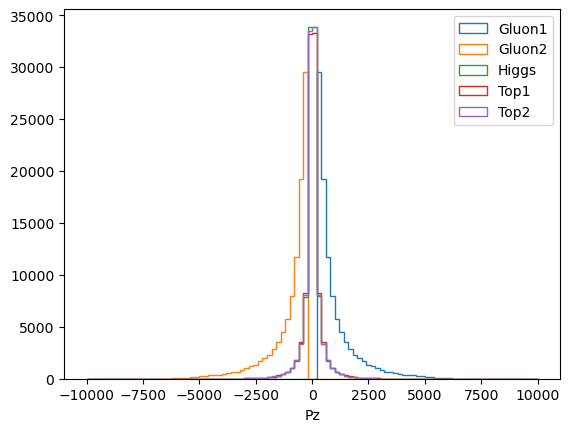

In [5]:
plt.hist(momenta[:,0,3], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon1")
plt.hist(momenta[:,1,3], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon2")
plt.hist(momenta[:,2,3], bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(momenta[:,3,3], bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(momenta[:,4,3], bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Pz")

Text(0.5, 0, 'Px')

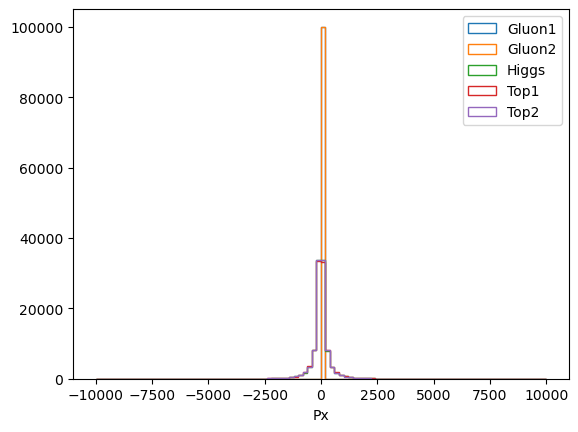

In [6]:
plt.hist(momenta[:,0,1], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon1")
plt.hist(momenta[:,1,1], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon2")
plt.hist(momenta[:,2,1], bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(momenta[:,3,1], bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(momenta[:,4,1], bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Px")

Text(0.5, 0, 'E')

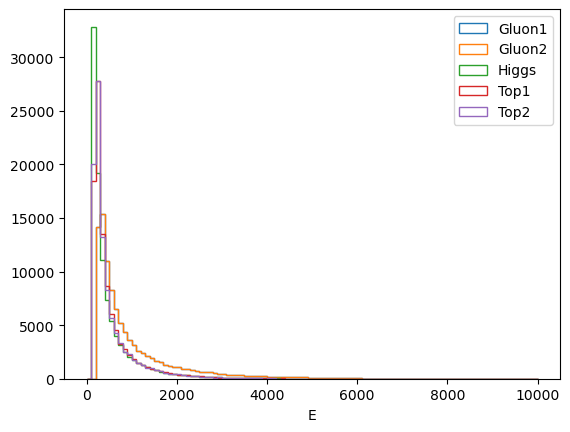

In [7]:
plt.hist(momenta[:,0,0], bins=100, range=(0,1e4), histtype="step", label="Gluon1")
plt.hist(momenta[:,1,0], bins=100, range=(0,1e4), histtype="step", label="Gluon2")
plt.hist(momenta[:,2,0], bins=100, range=(0,1e4), histtype="step", label="Higgs")
plt.hist(momenta[:,3,0], bins=100, range=(0,1e4), histtype="step", label="Top1")
plt.hist(momenta[:,4,0], bins=100, range=(0,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("E")

In [8]:
x1

tensor([0.4035, 0.3999, 0.1375,  ..., 0.2357, 0.0474, 0.0306])

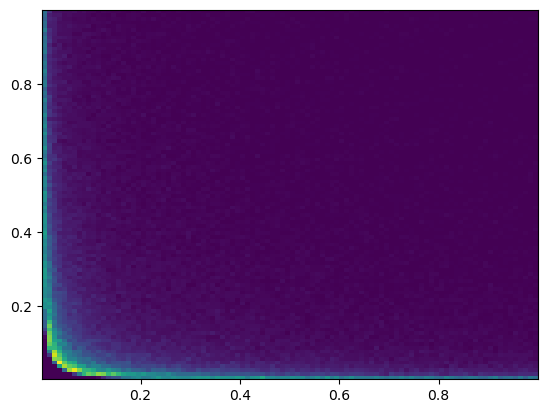

In [9]:
plt.hist2d(x1.numpy(), x2.numpy(), bins=100);

In [10]:
momenta

tensor([[[ 1.4617e+03,  0.0000e+00,  0.0000e+00,  1.4617e+03],
         [ 1.4617e+03,  0.0000e+00,  0.0000e+00, -1.4617e+03],
         [ 5.5691e+02, -1.7009e+02,  5.1530e+02, -6.7328e-01],
         [ 1.3318e+03,  1.0798e+03, -6.4821e+02, -3.9702e+02],
         [ 4.9127e+02, -4.2881e+02,  5.8657e+01,  1.5578e+02],
         [ 5.4344e+02, -4.8093e+02,  7.4251e+01,  2.4191e+02]],

        [[ 2.3694e+02,  0.0000e+00,  0.0000e+00,  2.3694e+02],
         [ 2.3694e+02,  0.0000e+00,  0.0000e+00, -2.3694e+02],
         [ 1.2692e+02,  1.1653e+00, -1.6390e+01,  1.2322e+01],
         [ 1.7286e+02, -6.4022e+00,  8.6287e+00, -2.8981e+00],
         [ 1.7293e+02,  5.1629e+00,  6.8302e+00, -8.7107e+00],
         [ 1.1753e+00,  7.4070e-02,  9.3115e-01, -7.1327e-01]],

        [[ 1.4442e+03,  0.0000e+00,  0.0000e+00,  1.4442e+03],
         [ 1.4442e+03,  0.0000e+00,  0.0000e+00, -1.4442e+03],
         [ 7.7624e+02, -6.5443e+02, -3.4270e+02, -2.0282e+02],
         [ 9.9420e+02,  8.5405e+02, -1.4471e+02,  4

# Go back from momenta and x1 x2 to phasespace points

In [11]:
PS, prob = phasespace.get_ps_from_momenta(momenta[:,2:], x1, x2)  #get from partons and 
print(PS.shape)
print(points_out.shape)

torch.Size([100000, 10])
torch.Size([100000, 10])


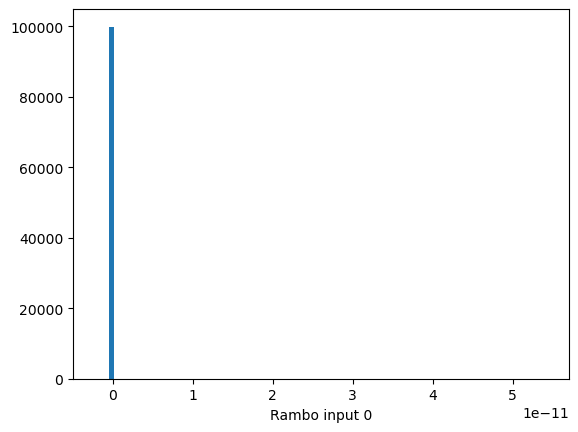

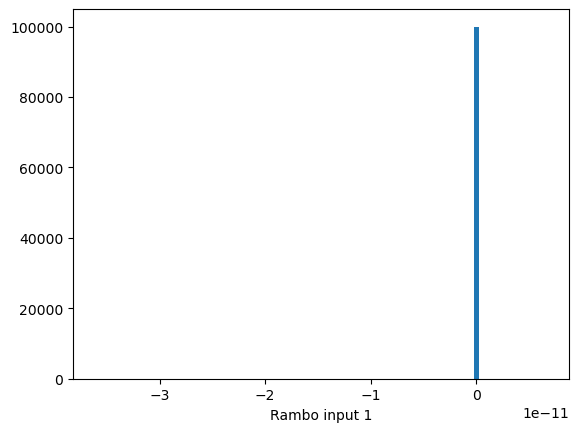

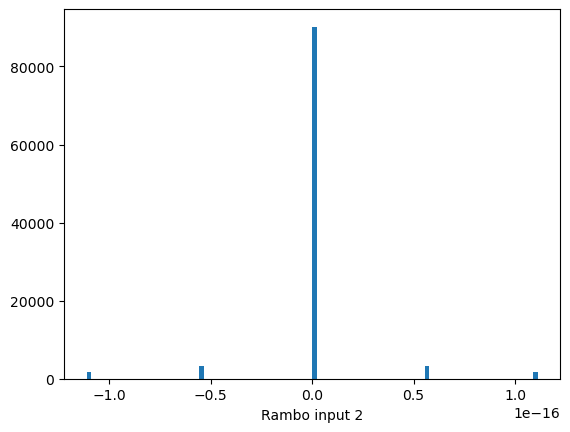

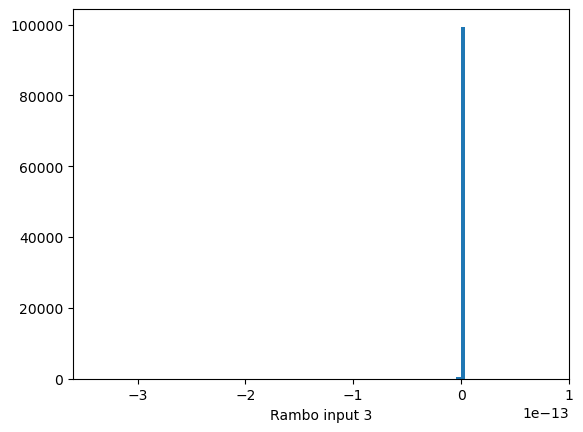

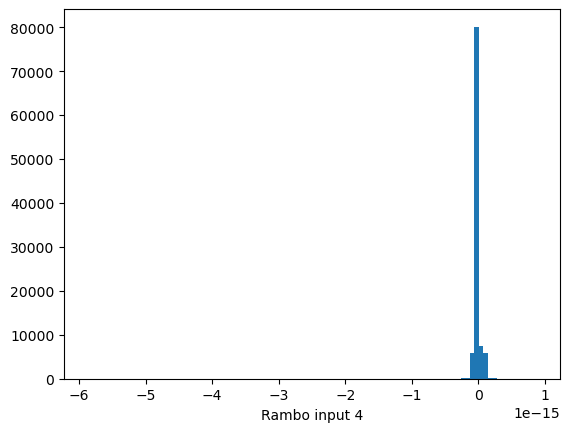

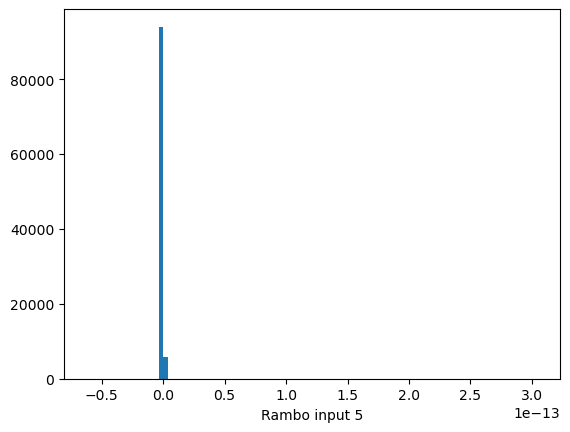

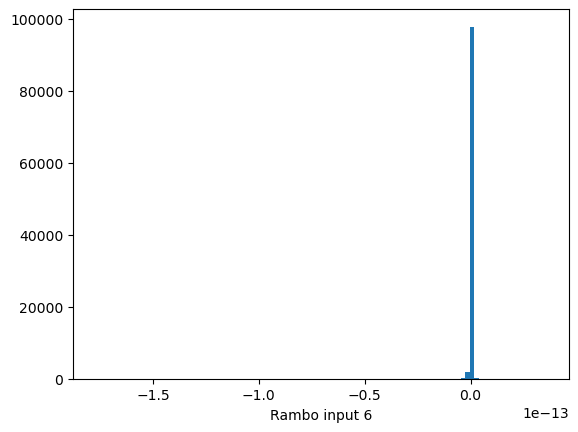

In [12]:
for i in range(7):
    plt.figure()
    plt.hist((PS[:,i] - points_out[:,i]).flatten().numpy(), bins=100);
    plt.xlabel(f"Rambo input {i}")

# Compare PS --> momenta --> PS

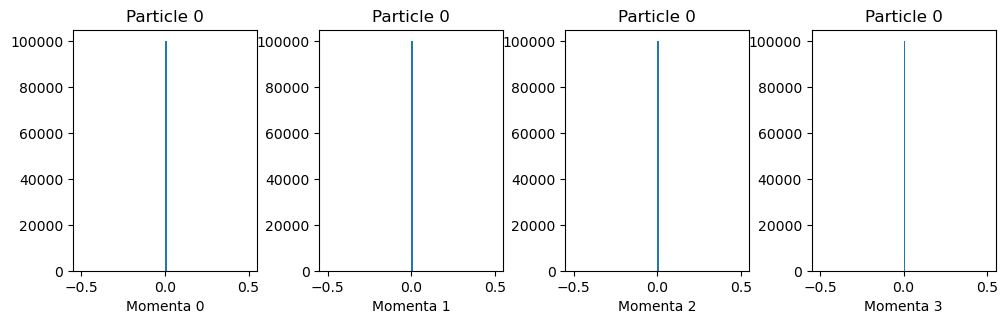

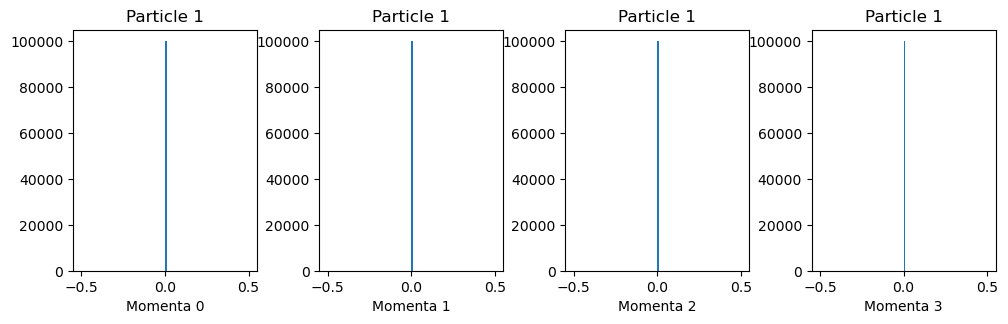

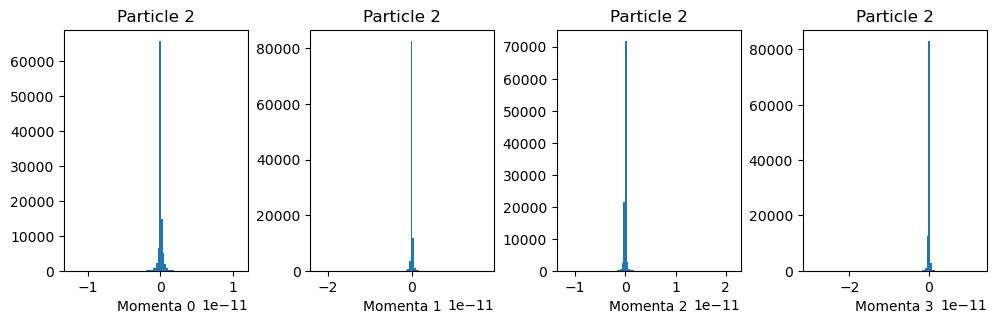

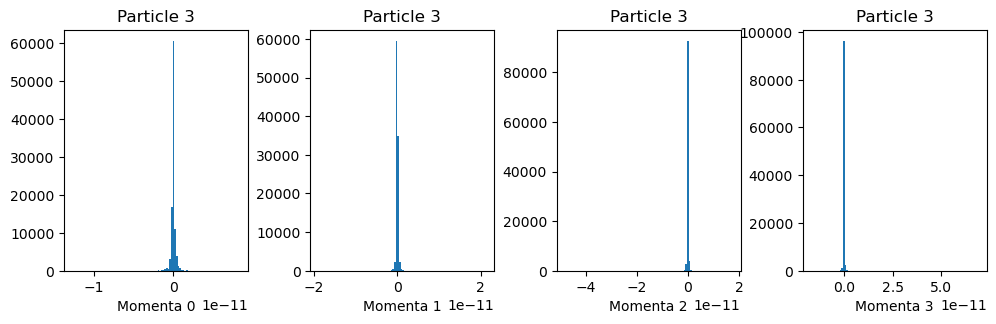

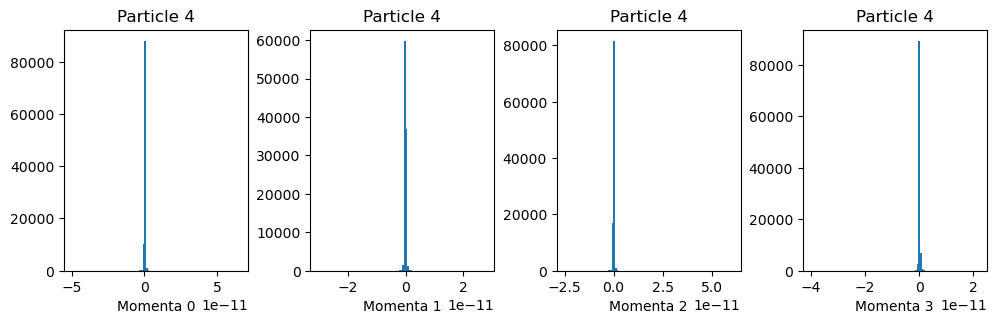

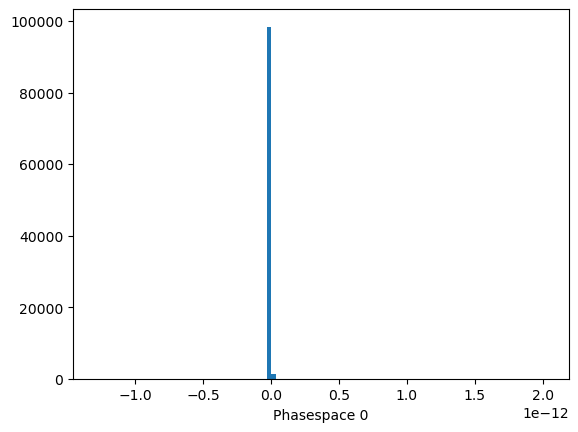

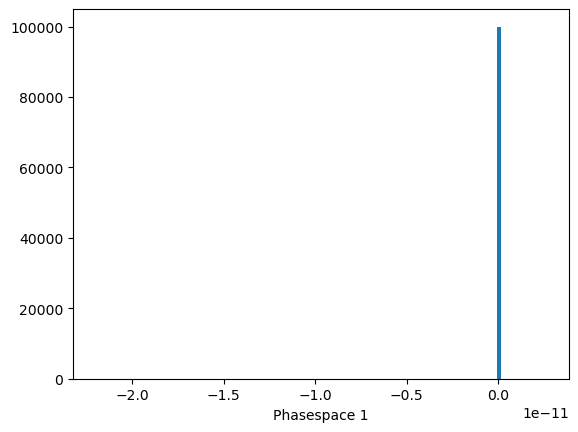

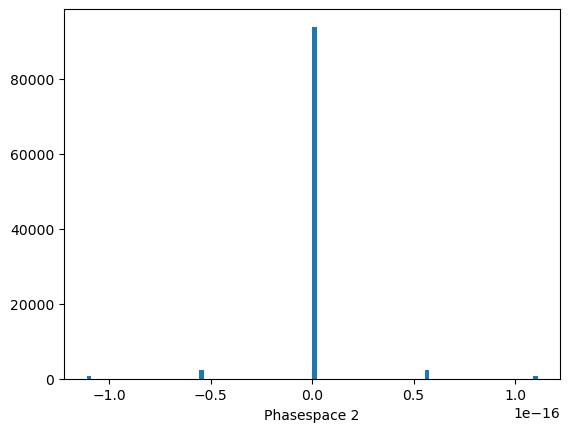

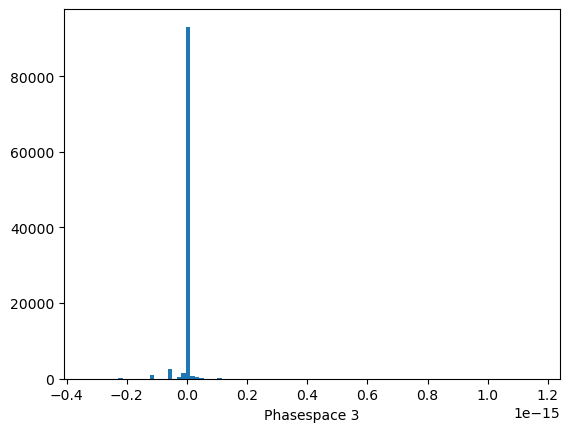

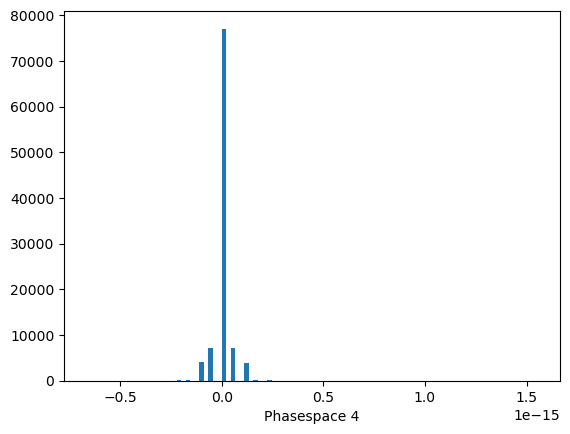

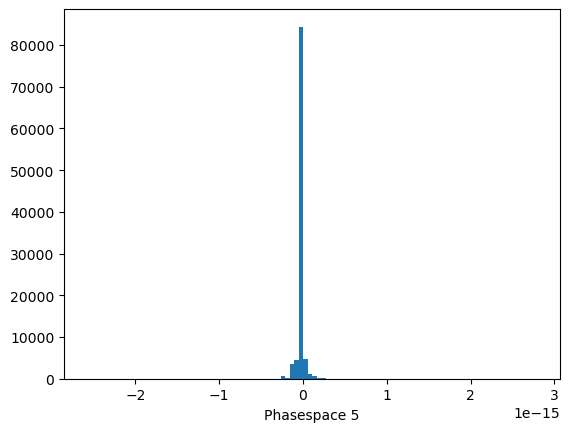

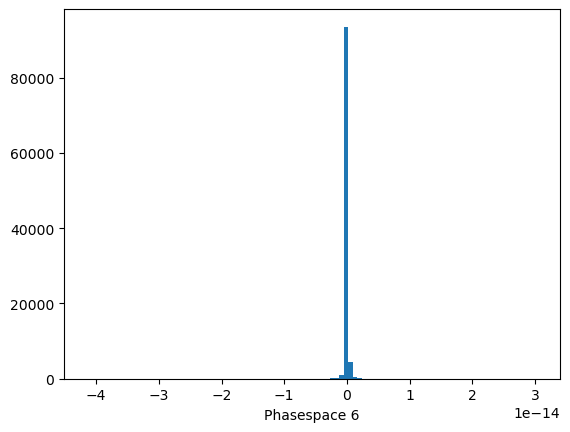

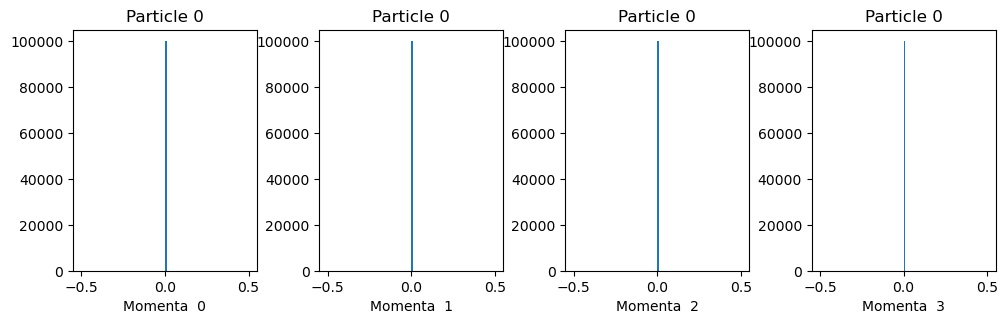

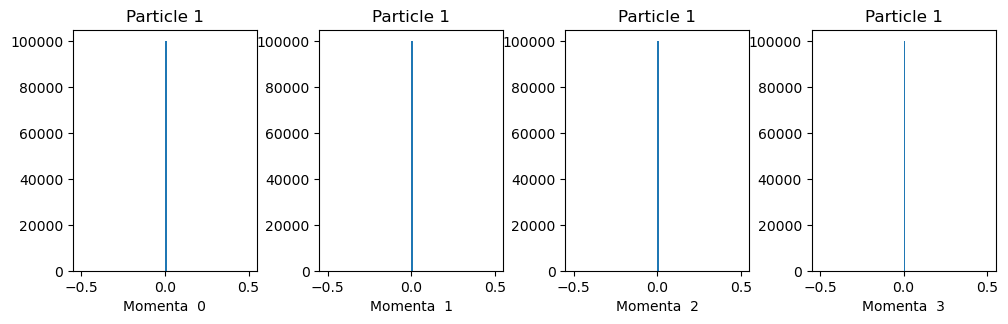

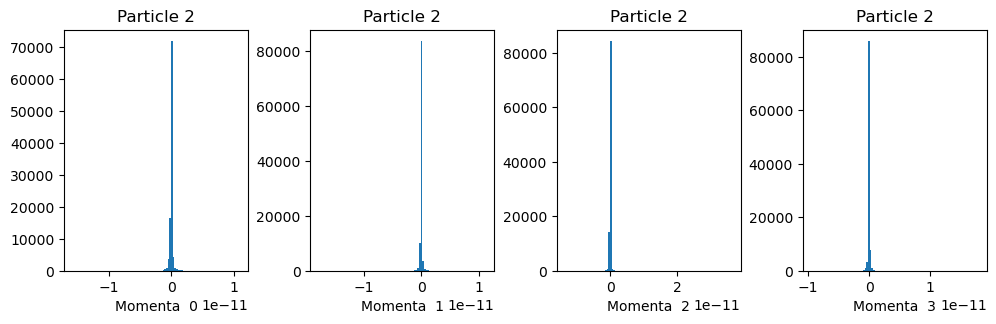

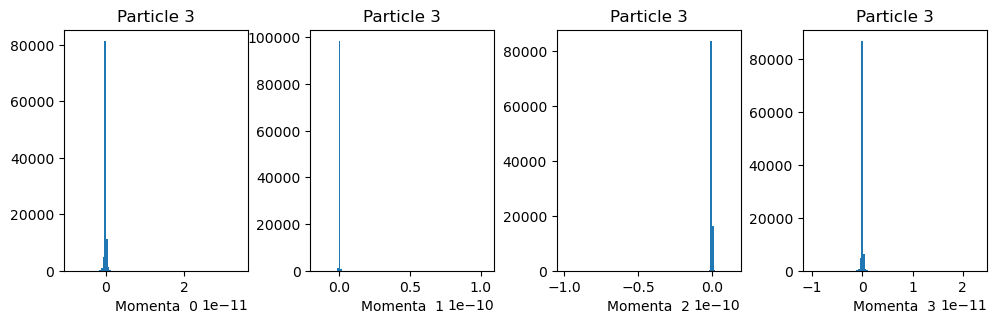

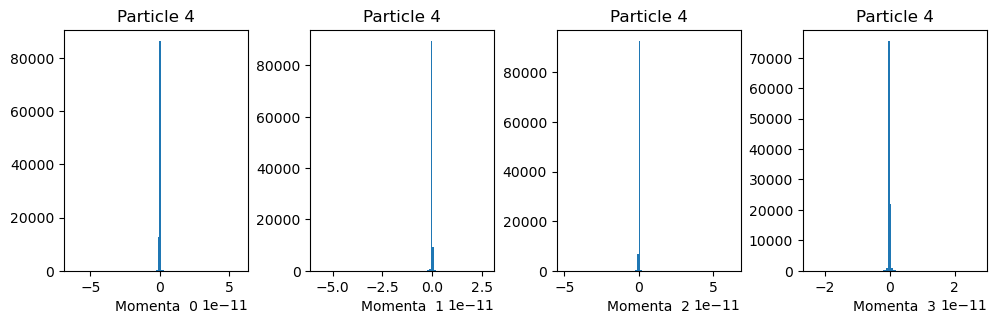

In [14]:
# start from MOMENTA
PS1, det = phasespace.get_ps_from_momenta(momenta[:,2:], x1, x2)
momenta2, weight, x1p, x2p = phasespace.get_momenta_from_ps(PS1)
PS2, det = phasespace.get_ps_from_momenta(momenta2[:,2:], x1p, x2p)
momenta3, weight, x1pp, x2pp = phasespace.get_momenta_from_ps(PS2)

particles = 5
for j in range(particles):
    f, axs = plt.subplots(1, 4, figsize=(10,3))
    plt.tight_layout()
    for i in range(4):
        ax = axs[i]
        ax.hist(momenta[:,j,i].numpy() - momenta2[:,j,i].numpy(), bins=100)
        ax.set_xlabel(f"Momenta {i}")
        ax.set_title(f"Particle {j}")

plt.figure()
for i in range(7):
    plt.hist((PS2-PS1)[:,i].numpy(), bins=100)
    plt.xlabel(f"Phasespace {i}")
    plt.show()

particles = 5
for j in range(particles):
    f, axs = plt.subplots(1, 4, figsize=(10,3))
    plt.tight_layout()
    for i in range(4):
        ax = axs[i]
        ax.hist(momenta3[:,j,i].numpy() - momenta2[:,j,i].numpy(), bins=100)
        ax.set_xlabel(f"Momenta  {i}")
        ax.set_title(f"Particle {j}")

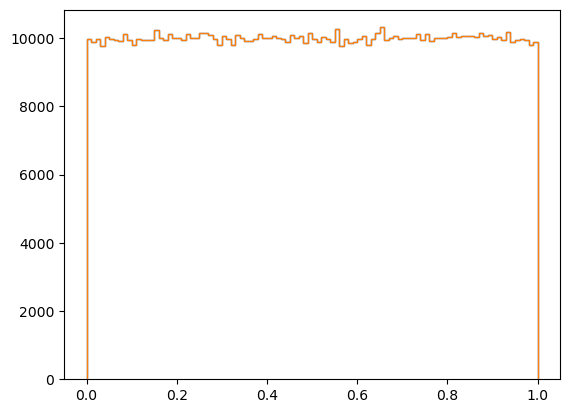

In [15]:
plt.hist(PS2.flatten().numpy(), bins=100, histtype="step");
plt.hist(PS1.flatten().numpy(), bins=100, histtype="step");

In [158]:
event_with_large_PS_diff = torch.any((PS2-PS1) > .4, axis=-1)

In [159]:
bad_events = momenta[event_with_large_PS_diff]
good_events = momenta[~event_with_large_PS_diff]
PS_bad = PS2[event_with_large_PS_diff]

Text(0.5, 0, 'Energy')

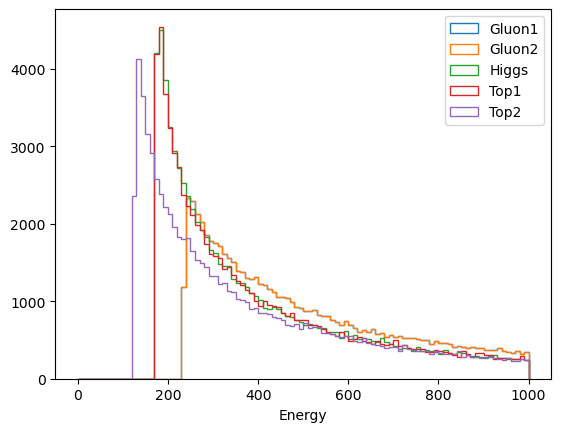

In [160]:
plt.hist(good_events[:,0,0], bins=100, range=(0,1e3), histtype="step", label="Gluon1")
plt.hist(good_events[:,1,0], bins=100, range=(0,1e3), histtype="step", label="Gluon2")
plt.hist(good_events[:,2,0], bins=100, range=(0,1e3), histtype="step", label="Higgs")
plt.hist(good_events[:,3,0], bins=100, range=(0,1e3), histtype="step", label="Top1")
plt.hist(good_events[:,4,0], bins=100, range=(0,1e3), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Energy")

Text(0.5, 0, 'Energy')

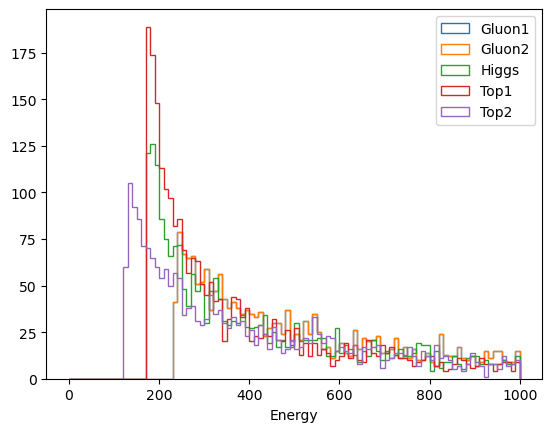

In [161]:
plt.hist(bad_events[:,0,0], bins=100, range=(0,1e3), histtype="step", label="Gluon1")
plt.hist(bad_events[:,1,0], bins=100, range=(0,1e3), histtype="step", label="Gluon2")
plt.hist(bad_events[:,2,0], bins=100, range=(0,1e3), histtype="step", label="Higgs")
plt.hist(bad_events[:,3,0], bins=100, range=(0,1e3), histtype="step", label="Top1")
plt.hist(bad_events[:,4,0], bins=100, range=(0,1e3), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Energy")

Text(0.5, 0, 'Px')

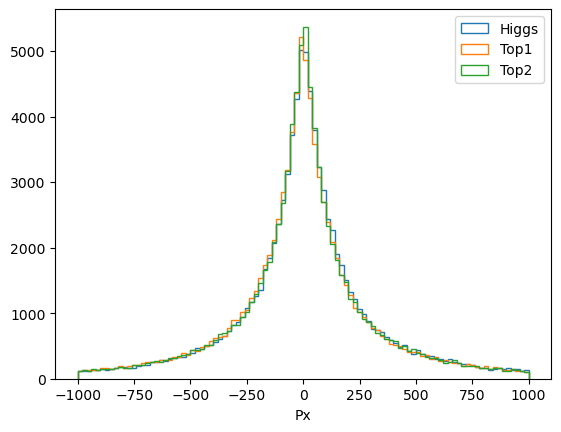

In [162]:
plt.hist(good_events[:,2,1], bins=100, range=(-1e3,1e3), histtype="step", label="Higgs")
plt.hist(good_events[:,3,1], bins=100, range=(-1e3,1e3), histtype="step", label="Top1")
plt.hist(good_events[:,4,1], bins=100, range=(-1e3,1e3), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Px")

Text(0.5, 0, 'Px')

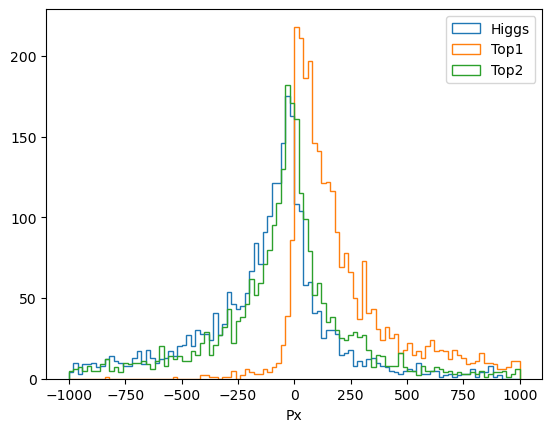

In [163]:
plt.hist(bad_events[:,2,1], bins=100, range=(-1e3,1e3), histtype="step", label="Higgs")
plt.hist(bad_events[:,3,1], bins=100, range=(-1e3,1e3), histtype="step", label="Top1")
plt.hist(bad_events[:,4,1], bins=100, range=(-1e3,1e3), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Px")

Text(0.5, 0, 'Py')

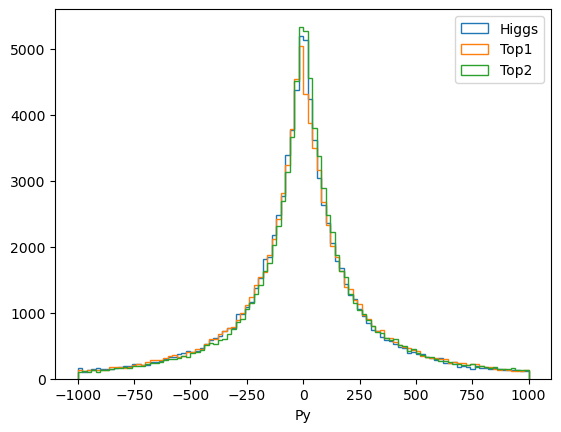

In [164]:
plt.hist(good_events[:,2,2], bins=100, range=(-1e3,1e3), histtype="step", label="Higgs")
plt.hist(good_events[:,3,2], bins=100, range=(-1e3,1e3), histtype="step", label="Top1")
plt.hist(good_events[:,4,2], bins=100, range=(-1e3,1e3), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Py")

Text(0.5, 0, 'Py')

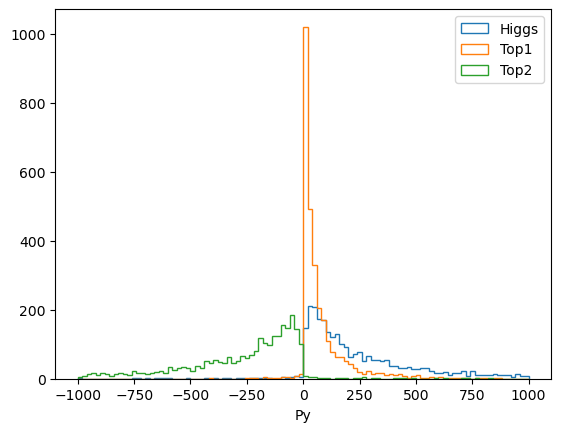

In [165]:
plt.hist(bad_events[:,2,2], bins=100, range=(-1e3,1e3), histtype="step", label="Higgs")
plt.hist(bad_events[:,3,2], bins=100, range=(-1e3,1e3), histtype="step", label="Top1")
plt.hist(bad_events[:,4,2], bins=100, range=(-1e3,1e3), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Py")

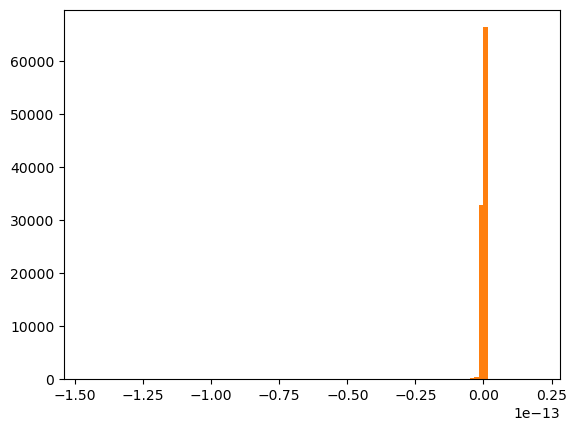

In [166]:
plt.hist((x1- x1p).numpy(), bins=100);
plt.hist((x2- x2p).numpy(), bins=100);

Text(0.5, 0, 'PZ')

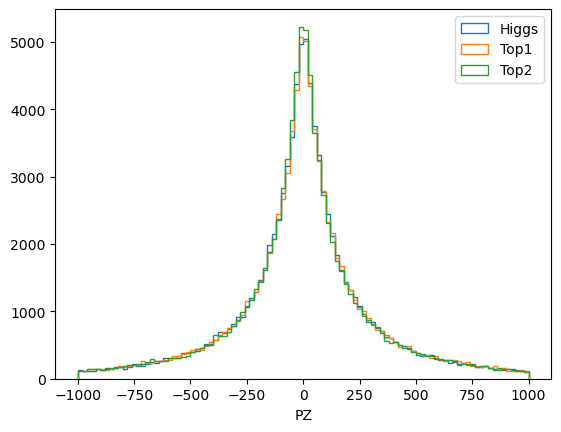

In [167]:
plt.hist(good_events[:,2,3], bins=100, range=(-1e3,1e3), histtype="step", label="Higgs")
plt.hist(good_events[:,3,3], bins=100, range=(-1e3,1e3), histtype="step", label="Top1")
plt.hist(good_events[:,4,3], bins=100, range=(-1e3,1e3), histtype="step", label="Top2")
plt.legend()
plt.xlabel("PZ")

Text(0.5, 0, 'Pz')

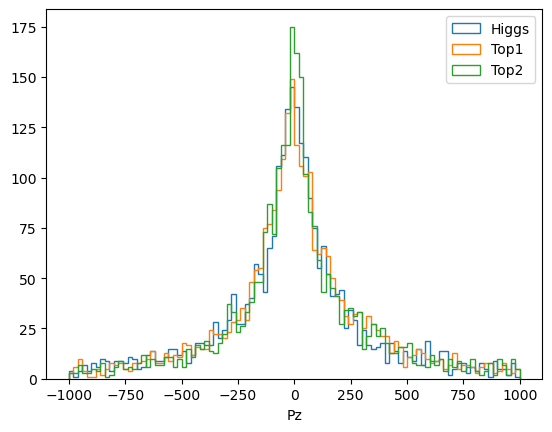

In [168]:
plt.hist(bad_events[:,2,3], bins=100, range=(-1e3,1e3), histtype="step", label="Higgs")
plt.hist(bad_events[:,3,3], bins=100, range=(-1e3,1e3), histtype="step", label="Top1")
plt.hist(bad_events[:,4,3], bins=100, range=(-1e3,1e3), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Pz")

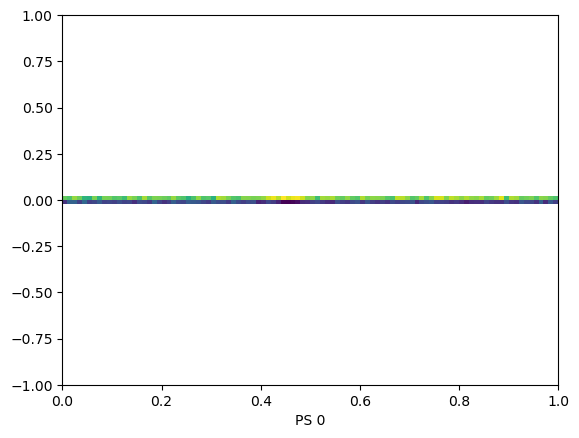

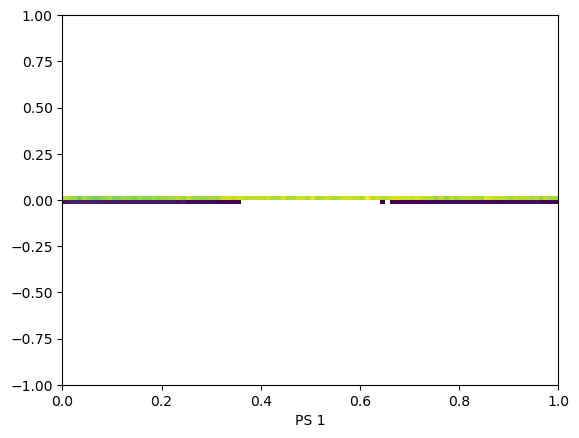

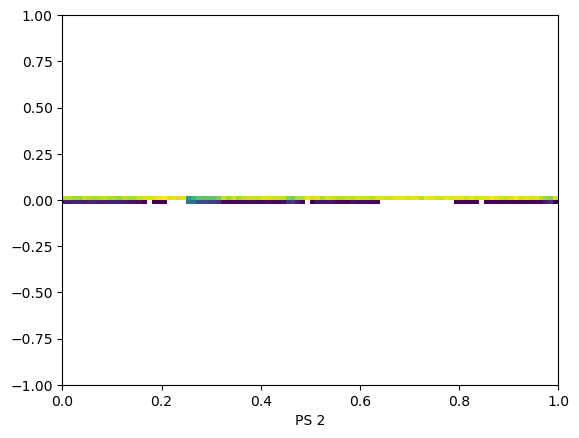

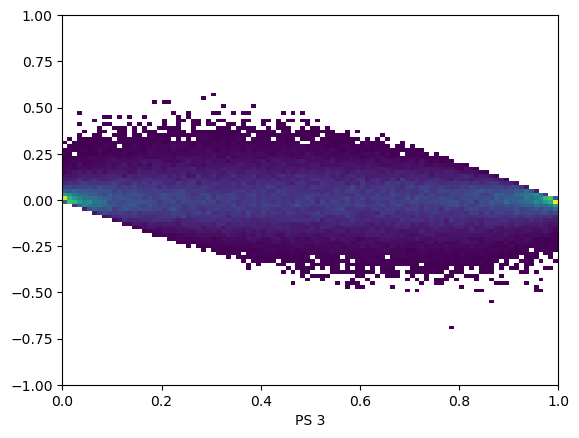

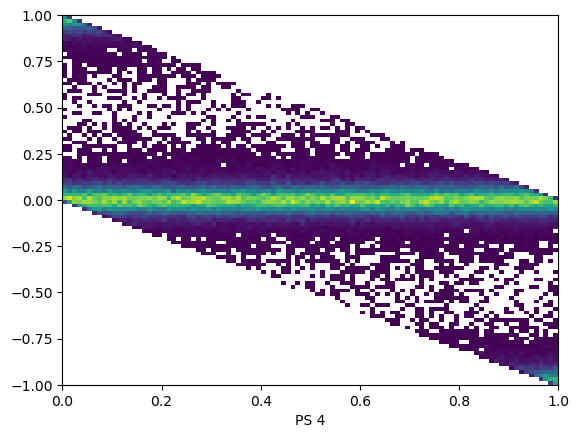

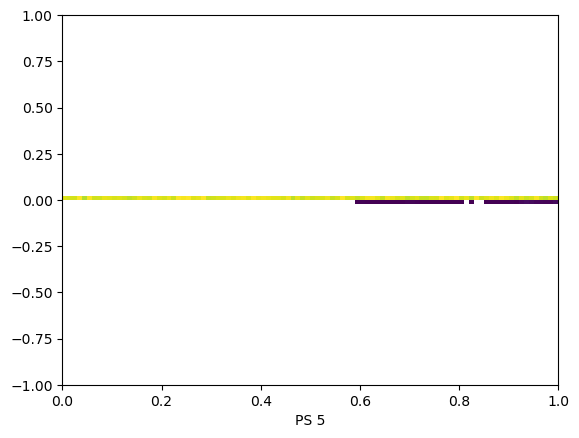

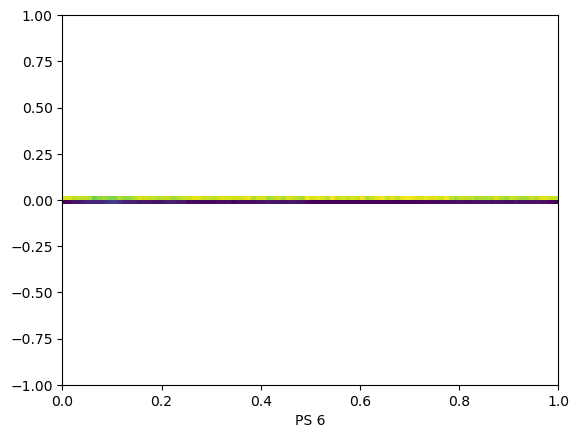

In [169]:
for i in range(7):
    plt.figure()
    plt.hist2d( PS1[:,i].numpy(), (PS2-PS1)[:,i].numpy(),
          bins=100,range=((0,1), (-1,1)), cmin=1);
    plt.xlabel(f"PS {i}")

In [170]:
bad_events

tensor([[[ 7.9125e+02,  0.0000e+00,  0.0000e+00,  7.9125e+02],
         [ 7.9125e+02,  0.0000e+00,  0.0000e+00, -7.9125e+02],
         [ 5.2681e+02, -3.6069e+02,  2.8517e+02,  1.9067e+02],
         [ 5.6015e+02,  3.6752e+02,  1.6784e+02, -3.4753e+02],
         [ 4.9554e+02, -6.8316e+00, -4.5301e+02,  1.5685e+02]],

        [[ 3.0263e+02,  0.0000e+00,  0.0000e+00,  3.0263e+02],
         [ 3.0263e+02,  0.0000e+00,  0.0000e+00, -3.0263e+02],
         [ 2.2166e+02,  1.1004e+02,  4.6908e+01,  7.1182e+01],
         [ 1.8626e+02,  3.4551e+01,  5.3808e-01, -6.1177e+01],
         [ 1.9735e+02, -1.4459e+02, -4.7446e+01, -1.0004e+01]],

        [[ 3.4910e+03,  0.0000e+00,  0.0000e+00,  3.4910e+03],
         [ 3.4910e+03,  0.0000e+00,  0.0000e+00, -3.4910e+03],
         [ 3.4609e+03, -3.7458e+02,  2.2147e+02,  3.4291e+03],
         [ 2.8976e+03,  3.0071e+02,  2.8603e+01, -2.8767e+03],
         [ 6.2359e+02,  7.3862e+01, -2.5007e+02, -5.5244e+02]],

        ...,

        [[ 1.5041e+03,  0.0000e+00,

In [171]:
(PS2-PS1)[:,i].numpy()

array([ 5.55111512e-17,  0.00000000e+00,  0.00000000e+00, ...,
        0.00000000e+00, -1.11022302e-16,  0.00000000e+00])

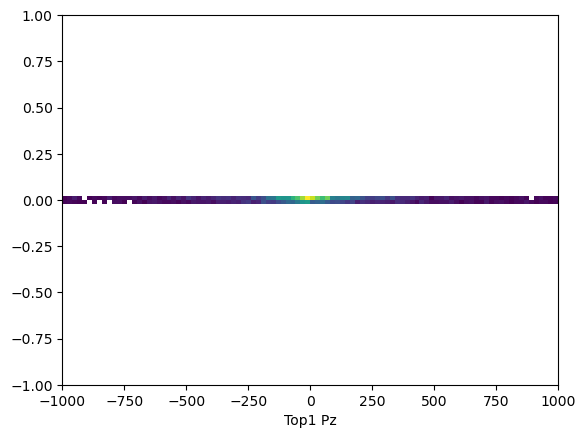

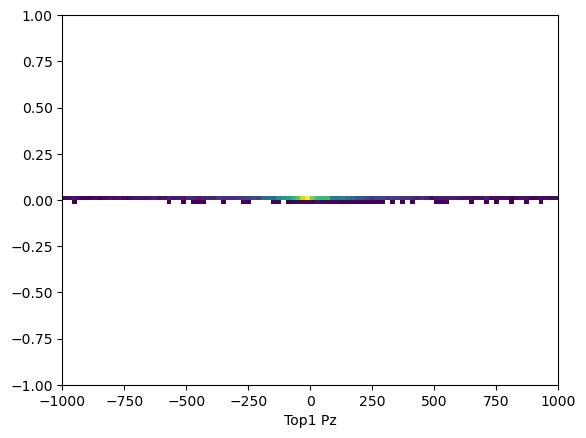

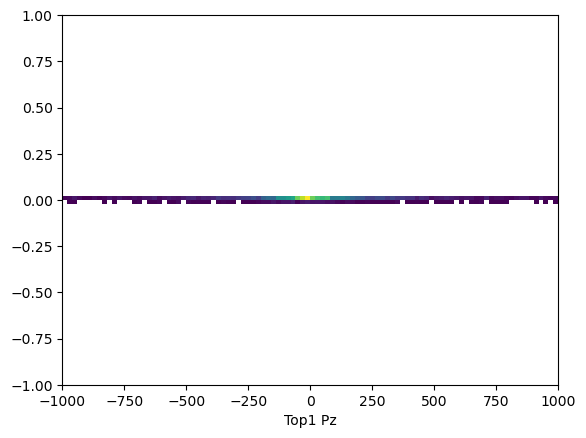

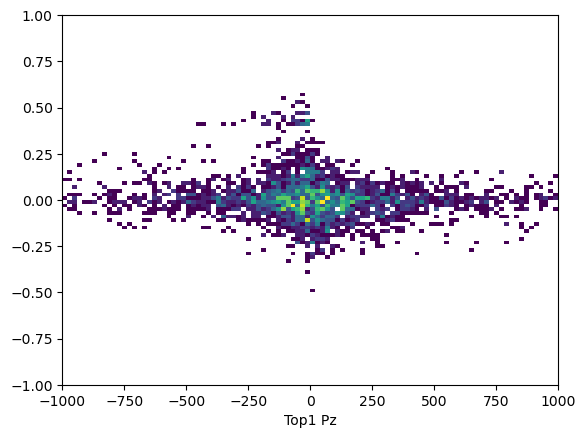

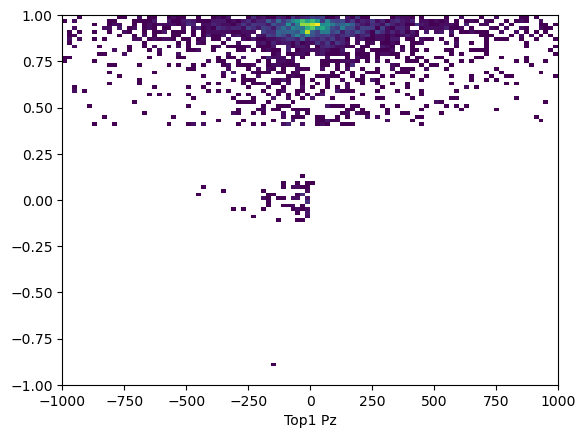

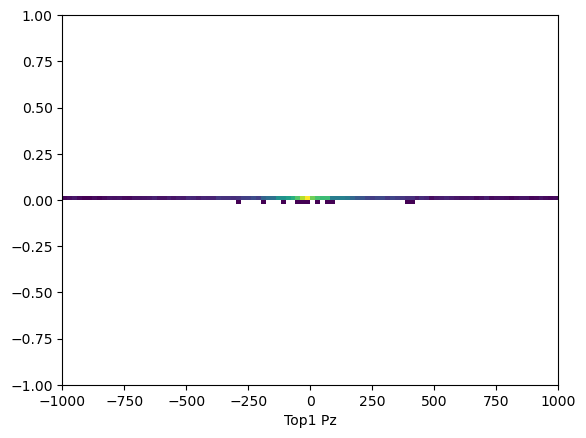

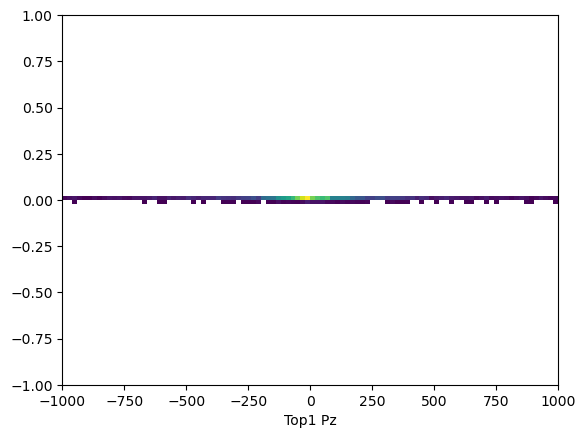

In [172]:
for i in range(7):
    plt.figure()
    plt.hist2d( bad_events[:,3,3].numpy(), (PS2[event_with_large_PS_diff]-PS1[event_with_large_PS_diff])[:,i].numpy(),
          bins=(100,100),range=((-1e3, 1e3), (-1,1)), cmin=1);
    plt.xlabel(f"Top1 Pz")

# Compare momenta --> ps --> momenta

In [16]:
momenta

tensor([[[ 1.4617e+03,  0.0000e+00,  0.0000e+00,  1.4617e+03],
         [ 1.4617e+03,  0.0000e+00,  0.0000e+00, -1.4617e+03],
         [ 5.5691e+02, -1.7009e+02,  5.1530e+02, -6.7328e-01],
         [ 1.3318e+03,  1.0798e+03, -6.4821e+02, -3.9702e+02],
         [ 4.9127e+02, -4.2881e+02,  5.8657e+01,  1.5578e+02],
         [ 5.4344e+02, -4.8093e+02,  7.4251e+01,  2.4191e+02]],

        [[ 2.3694e+02,  0.0000e+00,  0.0000e+00,  2.3694e+02],
         [ 2.3694e+02,  0.0000e+00,  0.0000e+00, -2.3694e+02],
         [ 1.2692e+02,  1.1653e+00, -1.6390e+01,  1.2322e+01],
         [ 1.7286e+02, -6.4022e+00,  8.6287e+00, -2.8981e+00],
         [ 1.7293e+02,  5.1629e+00,  6.8302e+00, -8.7107e+00],
         [ 1.1753e+00,  7.4070e-02,  9.3115e-01, -7.1327e-01]],

        [[ 1.4442e+03,  0.0000e+00,  0.0000e+00,  1.4442e+03],
         [ 1.4442e+03,  0.0000e+00,  0.0000e+00, -1.4442e+03],
         [ 7.7624e+02, -6.5443e+02, -3.4270e+02, -2.0282e+02],
         [ 9.9420e+02,  8.5405e+02, -1.4471e+02,  4

In [17]:
for i in range(7):
    plt.figure()
    plt.hist2d( PS1[event_with_large_PS_diff][:,3].numpy(), (PS2[event_with_large_PS_diff]-PS1[event_with_large_PS_diff])[:,i].numpy(),
          bins=(100,100),range=((0,1), (-1,1)), cmin=1);
    plt.xlabel(f"Top1 Pz")

NameError: name 'event_with_large_PS_diff' is not defined

<Figure size 640x480 with 0 Axes>

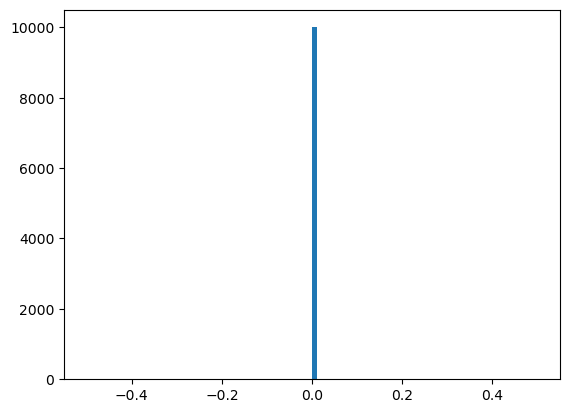

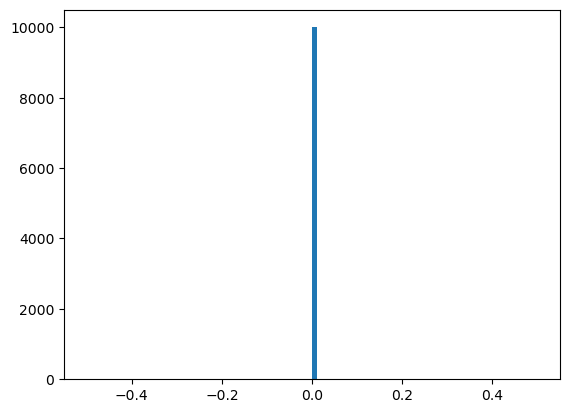

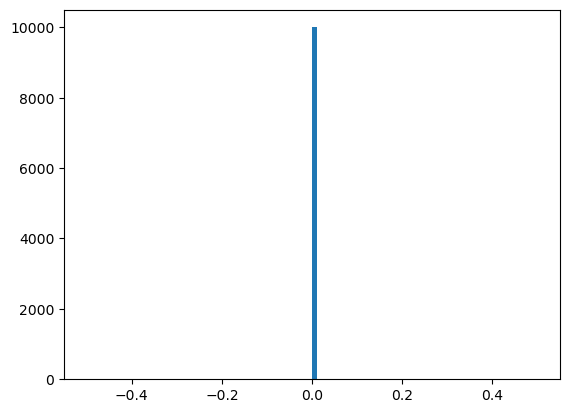

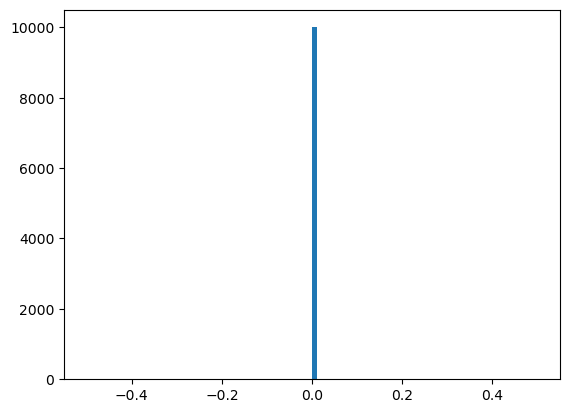

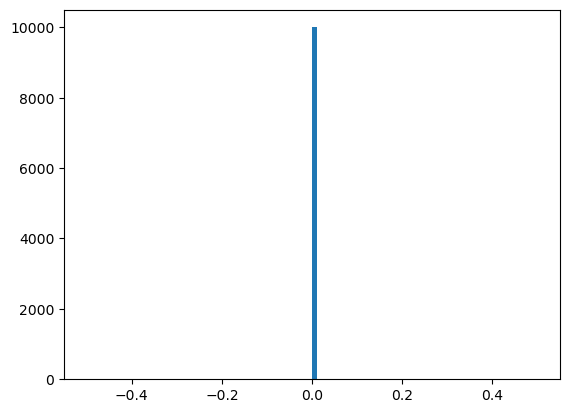

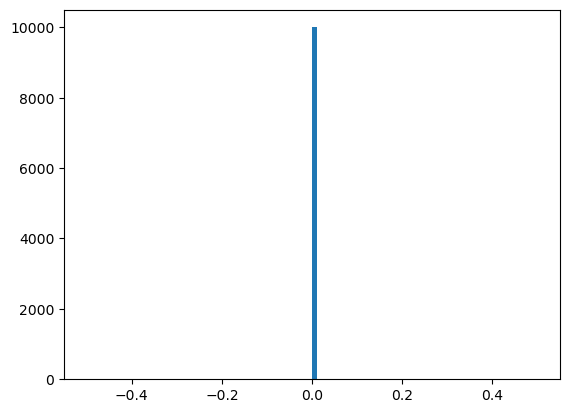

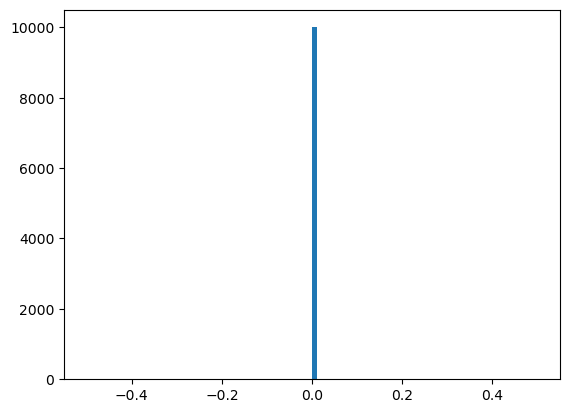

In [35]:
PS1, det = phasespace.get_ps_from_momenta(momenta[:,2:], x1, x2)

particle = 0

for i in range(7):
    plt.hist(PS1[:,i].numpy() - PS[:,i].numpy(), bins=100)
    plt.show()

In [60]:
r

tensor([[0.0734, 0.0128, 0.0174,  ..., 0.7399, 0.0262, 0.0436],
        [0.7153, 0.9773, 0.7909,  ..., 0.4436, 0.4514, 0.3812],
        [0.9255, 0.4108, 0.2456,  ..., 0.8408, 0.6334, 0.7337],
        ...,
        [0.5718, 0.4071, 0.1568,  ..., 0.9567, 0.7834, 0.5444],
        [0.3047, 0.6267, 0.4960,  ..., 0.2691, 0.6809, 0.6813],
        [0.0893, 0.2457, 0.0416,  ..., 0.5648, 0.9967, 0.2434]])